TRANSFORM THE DATA
* Use StandardScaler or MinMaxScaler to transform the numeric data.
 
SELECT VARIABLES
* Select three or more variables for clustering. Try to select variables based on a theme (i.e. variables convey similar type of information).

* **DO NOT USE TARGET VARIABLES TO CREATE CLUSTERS.
Hint: Try to avoid categorical variables or binary variables, they usually produce bad results.**
 

DETERMINE THE NUMBER OF CLUSTERS
* Calculate Intertia, Silhouette, and/or Calinski Harabaz scores.
* Graph the results of your scores.
* Determine a good number of clusters to use.
 

FIND THE KMEANS CLUSTERS
* Find the KMeans Clusters
* Using "groupby", profile the cluster centers.
* If possible, try to tell a story of the people who are members of each cluster. Do the clusters make sense?
* Determine if the clusters can be used to determine the Probability of Loan Default and Loss Amount given default.

In [257]:
# Load Packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [258]:
# Load dataset
FILE = 'HMEQ_Loss.csv'

# Create DataFrame
df = pd.read_csv(FILE)

# Store dtypes in new variable for later use
df_dtypes = df.dtypes

In [259]:
# Inspect DataFrame
df.head(2)

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN


In [260]:
# Inspect dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  1189 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   MORTDUE          5442 non-null   float64
 4   VALUE            5848 non-null   float64
 5   REASON           5708 non-null   object 
 6   JOB              5681 non-null   object 
 7   YOJ              5445 non-null   float64
 8   DEROG            5252 non-null   float64
 9   DELINQ           5380 non-null   float64
 10  CLAGE            5652 non-null   float64
 11  NINQ             5450 non-null   float64
 12  CLNO             5738 non-null   float64
 13  DEBTINC          4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [261]:
# Exclude target variables for now
# Create new variables names for target variables
TARGET_BF = 'TARGET_BAD_FLAG'
TARGET_LA = 'TARGET_LOSS_AMT'

In [262]:
# Create two lists to store objects by dtypes
objList = []
numList = []

for i in df_dtypes.index:
  if i in ([TARGET_BF, TARGET_LA]): continue
  if df_dtypes[i] in (['object']): objList.append(i)
  if df_dtypes[i] in (['float64', 'int64']): numList.append(i)  

In [263]:
print('List of objects:\n', objList, '\n')
print('List of numeric dtypes:\n', numList, '\n')

List of objects:
 ['REASON', 'JOB'] 

List of numeric dtypes:
 ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'] 



In [264]:
# Inspect all dtypes in objList 
for i in objList:
  show_me = df[i].value_counts(dropna=False)
  print('\n')
  print(show_me)



DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64


In [265]:
# Percent of missing values by dtype
df.isna().sum() / len(df)

TARGET_BAD_FLAG    0.000000
TARGET_LOSS_AMT    0.800503
LOAN               0.000000
MORTDUE            0.086913
VALUE              0.018792
REASON             0.042282
JOB                0.046812
YOJ                0.086409
DEROG              0.118792
DELINQ             0.097315
CLAGE              0.051678
NINQ               0.085570
CLNO               0.037248
DEBTINC            0.212584
dtype: float64

In [266]:
# Total missing values by dtypes
df.isna().sum()

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
dtype: int64

In [267]:
# Impute missing values for objects with NaNs in objList
for i in objList:
  df['REASON'] = df['REASON'].fillna(method='ffill')
  df['JOB'] = df['JOB'].fillna(method='ffill')

In [268]:
# Impute missing values for objects with NaNs in numList
for i in numList:
  median_value = df['LOAN'].median()
  df['LOAN'] = df['LOAN'].fillna(value=median_value)

  median_value = df['MORTDUE'].median()
  df['MORTDUE'] = df['MORTDUE'].fillna(value=median_value)

  median_value = df['VALUE'].median()
  df['VALUE'] = df['VALUE'].fillna(value=median_value)

  mean_value = df['YOJ'].mean()
  df['YOJ'] = df['YOJ'].fillna(value=mean_value)

  mean_value = df['DEROG'].mean()
  df['DEROG'] = df['DEROG'].fillna(value=mean_value)

  mean_value = df['DELINQ'].mean()
  df['DELINQ'] = df['DELINQ'].fillna(value=mean_value)
  
  mean_value = df['CLAGE'].mean()
  df['CLAGE'] = df['CLAGE'].fillna(value=mean_value)

  mean_value = df['NINQ'].mean()
  df['NINQ'] = df['NINQ'].fillna(value=mean_value)

  mean_value = df['CLNO'].mean()
  df['CLNO'] = df['CLNO'].fillna(value=mean_value)

  mean_value = df['DEBTINC'].mean()
  df['DEBTINC'] = df['DEBTINC'].fillna(value=mean_value)

In [269]:
# Impute missing values for target variables 
median_value = df['TARGET_LOSS_AMT'].median()
df['TARGET_LOSS_AMT'] = df['TARGET_LOSS_AMT'].fillna(value=median_value)

In [270]:
# Verify all missing values have been imputed
df.isna().sum()

TARGET_BAD_FLAG    0
TARGET_LOSS_AMT    0
LOAN               0
MORTDUE            0
VALUE              0
REASON             0
JOB                0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
dtype: int64

In [271]:
# Perform one-hot-encoding on objList to convert object variables to numeric
# Loop through each object list (objList and numList)
for i in objList :
  print("Class = ", i)
  thePrefix = "IMP_" + i
  print(thePrefix)
  y = pd.get_dummies(df[i], prefix = thePrefix, dummy_na = False)
  print(type(y))
  print(y.head().T)
  df = pd.concat([df, y], axis = 1)
  df = df.drop(i, axis = 1)

print(df.head().T)

Class =  REASON
IMP_REASON
<class 'pandas.core.frame.DataFrame'>
                    0  1  2  3  4
IMP_REASON_DebtCon  0  0  0  0  0
IMP_REASON_HomeImp  1  1  1  1  1
Class =  JOB
IMP_JOB
<class 'pandas.core.frame.DataFrame'>
                 0  1  2  3  4
IMP_JOB_Mgr      0  0  0  0  0
IMP_JOB_Office   0  0  0  0  1
IMP_JOB_Other    1  1  1  1  0
IMP_JOB_ProfExe  0  0  0  0  0
IMP_JOB_Sales    0  0  0  0  0
IMP_JOB_Self     0  0  0  0  0
                               0             1  ...             3              4
TARGET_BAD_FLAG         1.000000      1.000000  ...      1.000000       0.000000
TARGET_LOSS_AMT       641.000000   1109.000000  ...   1425.000000   11003.000000
LOAN                 1100.000000   1300.000000  ...   1500.000000    1700.000000
MORTDUE             25860.000000  70053.000000  ...  65019.000000   97800.000000
VALUE               39025.000000  68400.000000  ...  89235.500000  112000.000000
YOJ                    10.500000      7.000000  ...      8.922268      

In [272]:
# Copy Main DataFrame df to X_df
X_df = df.copy()
X_df = X_df.drop(TARGET_BF, axis=1)
X_df = X_df.drop(TARGET_LA, axis=1)
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LOAN                5960 non-null   int64  
 1   MORTDUE             5960 non-null   float64
 2   VALUE               5960 non-null   float64
 3   YOJ                 5960 non-null   float64
 4   DEROG               5960 non-null   float64
 5   DELINQ              5960 non-null   float64
 6   CLAGE               5960 non-null   float64
 7   NINQ                5960 non-null   float64
 8   CLNO                5960 non-null   float64
 9   DEBTINC             5960 non-null   float64
 10  IMP_REASON_DebtCon  5960 non-null   uint8  
 11  IMP_REASON_HomeImp  5960 non-null   uint8  
 12  IMP_JOB_Mgr         5960 non-null   uint8  
 13  IMP_JOB_Office      5960 non-null   uint8  
 14  IMP_JOB_Other       5960 non-null   uint8  
 15  IMP_JOB_ProfExe     5960 non-null   uint8  
 16  IMP_JO

In [273]:
# Create another DataFrame for target varibles
Y_df = df[[TARGET_BF, TARGET_LA]]
Y_df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.0,1.0,1.0,1.0,0.0
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,11003.0


In [274]:
# Store column variables in varNames
varNames = X_df.columns

# Transform
theScaler = MinMaxScaler()
##theScaler = StandardScaler()
theScaler.fit(X_df)
X_TRN = theScaler.transform(X_df)

In [275]:
# Create new DataFrame
X_TRN = pd.DataFrame(X_TRN)
print(X_TRN.head())

         0         1         2         3         4   ...   13   14   15   16   17
0  0.000000  0.059869  0.036590  0.256098  0.000000  ...  0.0  1.0  0.0  0.0  0.0
1  0.002252  0.171050  0.071234  0.170732  0.000000  ...  0.0  1.0  0.0  0.0  0.0
2  0.004505  0.028773  0.010261  0.097561  0.000000  ...  0.0  1.0  0.0  0.0  0.0
3  0.004505  0.158385  0.095807  0.217616  0.025457  ...  0.0  1.0  0.0  0.0  0.0
4  0.006757  0.240856  0.122655  0.073171  0.000000  ...  1.0  0.0  0.0  0.0  0.0

[5 rows x 18 columns]


In [276]:
# Create list of variable names
varNames_trn = []

for i in varNames :
    newName = "trn_" + i
    varNames_trn.append( newName )

print(varNames_trn)

X_TRN.columns = varNames_trn
print(X_TRN.head())
print(X_TRN.describe())

['trn_LOAN', 'trn_MORTDUE', 'trn_VALUE', 'trn_YOJ', 'trn_DEROG', 'trn_DELINQ', 'trn_CLAGE', 'trn_NINQ', 'trn_CLNO', 'trn_DEBTINC', 'trn_IMP_REASON_DebtCon', 'trn_IMP_REASON_HomeImp', 'trn_IMP_JOB_Mgr', 'trn_IMP_JOB_Office', 'trn_IMP_JOB_Other', 'trn_IMP_JOB_ProfExe', 'trn_IMP_JOB_Sales', 'trn_IMP_JOB_Self']
   trn_LOAN  trn_MORTDUE  ...  trn_IMP_JOB_Sales  trn_IMP_JOB_Self
0  0.000000     0.059869  ...                0.0               0.0
1  0.002252     0.171050  ...                0.0               0.0
2  0.004505     0.028773  ...                0.0               0.0
3  0.004505     0.158385  ...                0.0               0.0
4  0.006757     0.240856  ...                0.0               0.0

[5 rows x 18 columns]
          trn_LOAN  trn_MORTDUE  ...  trn_IMP_JOB_Sales  trn_IMP_JOB_Self
count  5960.000000  5960.000000  ...        5960.000000       5960.000000
mean      0.197162     0.178466  ...           0.019631          0.035738
std       0.126210     0.107054  ...        

## Clustering using KMeans (Directly)

In [277]:
# Creating clusters to identify best number of clusters
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

for K in range(3, 12) :
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(X_TRN)
    #Y = km.predict( X_TRN )
    K_LIST.append(K)
    I_LIST.append(km.inertia_)
    S_LIST.append(silhouette_score(X_TRN,km.labels_))
    C_LIST.append(calinski_harabaz_score(X_TRN,km.labels_))

def drawElbow(K, SCORE, LABEL):
    plt.plot(K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

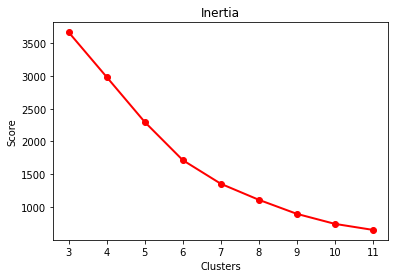

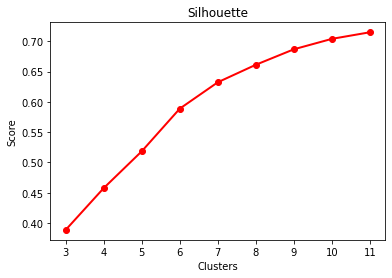

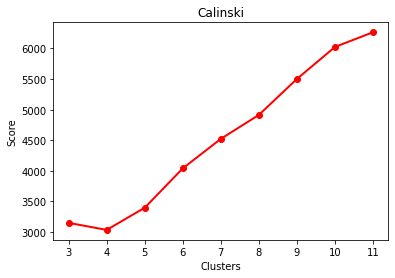

In [278]:
drawElbow(K_LIST, I_LIST, "Inertia")
drawElbow(K_LIST, S_LIST, "Silhouette")
drawElbow(K_LIST, C_LIST, "Calinski")

### ClusterData() to identify Current Accounts (value: 0) vs default account (value: 1)
Notes: 
* 6 Clusers works best as it reduces *messiness* of within each cluster
* Experiment with `random_state=`

In [279]:
# To predict current account (0) vs default account (1)
TARGET = 'TARGET_BF' 

def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ", K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    print( G.mean() )
    print("\n\n\n")
    print( G[TARGET_BF].value_counts() )

clusterData(df, X_TRN, 3, TARGET)
clusterData(df, X_TRN, 4, TARGET)
clusterData(df, X_TRN, 6, TARGET)
# clusterData(df, X_TRN, 7, TARGET)
# clusterData(df, X_TRN, 8, TARGET)
# clusterData(df, X_TRN, 9, TARGET)
# clusterData(df, X_TRN, 10, TARGET)





K =  3
   TARGET_BAD_FLAG  TARGET_LOSS_AMT  LOAN  ...  IMP_JOB_Sales  IMP_JOB_Self  CLUSTER
0                1            641.0  1100  ...              0             0        1
1                1           1109.0  1300  ...              0             0        1
2                1            767.0  1500  ...              0             0        1
3                1           1425.0  1500  ...              0             0        1
4                0          11003.0  1700  ...              0             0        1

[5 rows x 21 columns]
         TARGET_BAD_FLAG  TARGET_LOSS_AMT  ...  IMP_JOB_Sales  IMP_JOB_Self
CLUSTER                                    ...                             
0               0.201153     11721.004611  ...       0.000000      0.000000
1               0.221983     10464.024784  ...       0.008082      0.070043
2               0.180667     12109.781342  ...       0.043056      0.035036

[3 rows x 20 columns]




CLUSTER  TARGET_BAD_FLAG
0        0              

## Using PCA and KMeans Clustering

In [280]:
# Main DataFrame
df = pd.read_csv('HMEQ_Loss.csv')

In [281]:
# Read in dataset
FILE = 'HMEQ_Loss.csv'
X_df = pd.read_csv(FILE)

In [282]:
# Store column names in new variable
varNames = X_df.columns
varNames

Index(['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT', 'LOAN', 'MORTDUE', 'VALUE',
       'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC'],
      dtype='object')

In [283]:
# Remove string object variables
TARGET_BF = 'TARGET_BAD_FLAG'
TARGET_LA = 'TARGET_LOSS_AMT'
REASON = 'REASON'
JOB = 'JOB'

In [284]:
# Remove target variables and categorical variables
X_df = X_df.drop([TARGET_BF, TARGET_LA, REASON, JOB], axis=1)

In [285]:
# Verify Drop
X_df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### Impute Missing Values
* Must do before standardizing dataset

NOTES:
* Main DataFrame: `pca_km_df`
* Test DataFrame: `X_df`
* `varNames` stores X_df.columns

In [286]:
# Create new DataFrame of num dtypes
X = X_df.dtypes

# Store num types in numList
X_numList = []

# Loop through index and store in numList
# Remove 
for i in X.index:
  if i in ([TARGET_BF, TARGET_LA, JOB, REASON]): continue
  if X[i] in (['float64', 'int64']): X_numList.append(i)

print('Numeric variables:\n', X_numList)

Numeric variables:
 ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [287]:
# Fill in missing values using an appropiate method
for i in X_numList: 
  '''CLAGE is credit line age in months'''
  if X_df[i].isna().sum() == 0: continue
  mean_value = X_df['CLAGE'].mean()
  X_df['CLAGE'] = X_df['CLAGE'].fillna(value=mean_value)

  '''CLNO is # of credit lines'''
  mean_value = X_df['CLNO'].mean()
  X_df['CLNO'] = X_df['CLNO'].fillna(value=mean_value)

  '''NINQ is # of credit inquiries'''
  mean_value = X_df['NINQ'].mean()
  X_df['NINQ'] = X_df['NINQ'].fillna(value=mean_value)

  '''DELINQ is # of delinquencies on credit report (last 3 yrs)'''
  mean_value = X_df['DELINQ'].mean()
  X_df['DELINQ'] = X_df['DELINQ'].fillna(value=mean_value)

  '''DEBTINC is DTI ratio (%)'''
  mean_value = X_df['DEBTINC'].mean()
  X_df['DEBTINC'] = X_df['DEBTINC'].fillna(value=mean_value)

  '''DEROG is # of bad marks on credit report (last 7 yrs)'''
  mean_value = X_df['DEROG'].mean()
  X_df['DEROG'] = X_df['DEROG'].fillna(value=mean_value)

  '''YOJ is # yrs of employment'''
  mean_value = X_df['YOJ'].mean()
  X_df['YOJ'] = X_df['YOJ'].fillna(value=mean_value)
  
  '''VALUE is # yrs of employment'''
  mean_value = X_df['VALUE'].mean()
  X_df['VALUE'] = X_df['VALUE'].fillna(value=mean_value)

  '''MORTDUE amount of mortgage owed'''
  mean_value = X_df['MORTDUE'].mean()
  X_df['MORTDUE'] = X_df['MORTDUE'].fillna(value=mean_value)

  '''LOAN amount of mortgage owed'''
  mean_value = X_df['LOAN'].mean()
  X_df['LOAN'] = X_df['LOAN'].fillna(value=mean_value)
  break

In [288]:
# Verify fillna
X_df.isna().sum()

LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

### Standardize Dataset
 * Must do before PCA 

Notes: 
  * Array that stores the scaled and transformed `X_df` data: `X_STD` 

In [289]:
# Standardize the data (i.e., substract mean, divide stddev, +/- 3)
# This method rescales variables
theScaler = StandardScaler()
theScaler.fit(X_df)
X_STD = theScaler.transform(X_df)

In [290]:
# Confirms number of variables to perform PCA
MAX_N = X_STD.shape[1]
MAX_N

10

In [291]:
# Create PCs
pca = PCA(n_components=MAX_N)
pca.fit(X_STD)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [292]:
# Inspect eigenvalues
# This tells us how much information is in each PC
eigenval = pca.explained_variance_
print('Eigen Values:')
print(eigenval)

Eigen Values:
[2.20903156 1.40677622 1.24252493 1.00465852 0.96795576 0.84522852
 0.77582273 0.71390901 0.63053507 0.20523582]


In [293]:
# Identify relevant PCs for analysis
varPCT = []
totPCT = []
total = 0

for i in eigenval:
  total = total + i
  VAR = int(i / len(eigenval) * 100)
  PCT = int(total / len(eigenval) * 100)
  varPCT.append(VAR)
  totPCT.append(PCT)
  print(round(i, 2), 'variation=', VAR, '%', 'total=', PCT, '%')

2.21 variation= 22 % total= 22 %
1.41 variation= 14 % total= 36 %
1.24 variation= 12 % total= 48 %
1.0 variation= 10 % total= 58 %
0.97 variation= 9 % total= 68 %
0.85 variation= 8 % total= 76 %
0.78 variation= 7 % total= 84 %
0.71 variation= 7 % total= 91 %
0.63 variation= 6 % total= 97 %
0.21 variation= 2 % total= 100 %


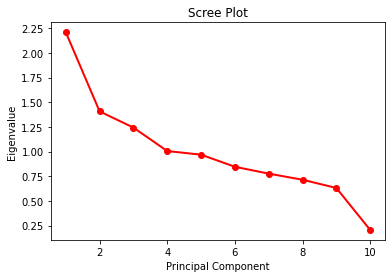

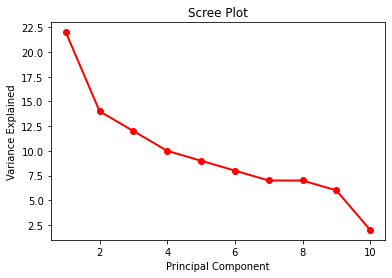

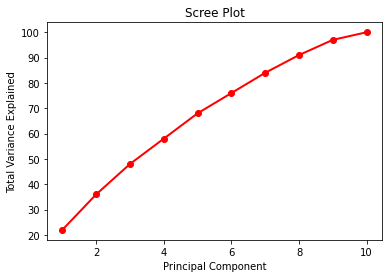

In [294]:
# Create SCREE Plot
# Notes: arange will give you 0-10(MAX_N of PCs); +1 will give 0-11 but capture 10th PCs
PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM , eigenval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

### Convert PC dataset (eigenval) into a DataFrame

In [295]:
# Convert PC dataset (eigenval) into a DataFrame
dfc = pd.DataFrame(pca.components_)
dfc.columns = list(X_df.columns)
print(dfc.T)

                0         1         2  ...         7         8         9
LOAN     0.316157 -0.085506 -0.058048  ... -0.559959 -0.216561 -0.104324
MORTDUE  0.572706  0.012686 -0.210628  ...  0.241614  0.131950 -0.690655
VALUE    0.587073 -0.058910 -0.172060  ...  0.203326  0.143431  0.710782
YOJ      0.028198 -0.328279  0.507770  ...  0.565175 -0.077200 -0.060564
DEROG   -0.028835  0.511672  0.229386  ...  0.310006  0.053617 -0.013955
DELINQ   0.039820  0.367929  0.508660  ... -0.278075  0.193360  0.002574
CLAGE    0.234275 -0.329736  0.476089  ... -0.291827  0.511347 -0.021518
NINQ     0.040901  0.507145 -0.043158  ... -0.032243  0.196703  0.024526
CLNO     0.367464  0.184683  0.334482  ... -0.053116 -0.718996  0.044354
DEBTINC  0.180551  0.289968 -0.114357  ...  0.069643  0.227533  0.001035

[10 rows x 10 columns]


In [296]:
# Generate PC values
X_PCA = pca.transform(X_STD) 

# Create PC DataFrame
X_PCA = pd.DataFrame(X_PCA)

In [297]:
# Inspect DataFrame
# Read PCs row-wise PC0, PC1, PC2.....
X_PCA.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.487482,-0.154033,-0.553363,-0.236149,0.481440,0.143878,-0.390052,0.885953,0.260009,0.111701
1,-1.284904,0.350671,0.192724,-1.378032,-0.098753,1.157048,-1.009796,0.336696,0.553678,-0.206891
2,-2.707319,-0.041734,-0.534944,-0.713565,0.575454,-0.200819,0.113075,0.010519,0.491793,0.074416
3,-0.482648,0.130534,0.088617,-1.009364,0.238630,-0.295851,-0.209732,0.854837,0.330604,0.159261
4,-0.619048,-0.082542,-1.471846,-1.376582,-0.174272,0.441983,-0.276338,0.937055,0.249294,-0.080535


In [298]:
# Name PCs for ease of viewing
colNames = X_PCA
pcaNames = []

# Loop through list
for i in colNames:
  index = int(i) + 1 #Python starts at 0, but we want to start at 1
  theName = 'PC_' + str(index)
  pcaNames.append(theName)

# Append list of pcaNames to X_PCA.columns
X_PCA.columns = pcaNames
print(X_PCA.head())

       PC_1      PC_2      PC_3  ...      PC_8      PC_9     PC_10
0 -2.487482 -0.154033 -0.553363  ...  0.885953  0.260009  0.111701
1 -1.284904  0.350671  0.192724  ...  0.336696  0.553678 -0.206891
2 -2.707319 -0.041734 -0.534944  ...  0.010519  0.491793  0.074416
3 -0.482648  0.130534  0.088617  ...  0.854837  0.330604  0.159261
4 -0.619048 -0.082542 -1.471846  ...  0.937055  0.249294 -0.080535

[5 rows x 10 columns]


In [299]:
# Append target variables (for flag and loss) and categorical variables REASON and JOB to X_PCA
X_PCA['TARGET_BF'] = df.TARGET_BAD_FLAG
X_PCA['TARGET_LA'] = df.TARGET_LOSS_AMT
X_PCA['REASON'] = df.REASON
X_PCA['JOB'] = df.JOB

In [300]:
# Impute missing values for target and categorical variables
df_dtypes = df.dtypes

objList = []

for i in df_dtypes.index:
  if i in ([TARGET_BF, TARGET_LA]): continue
  if df_dtypes[i] in (['object']): objList.append(i)

print('Non-numeric variables:\n', objList,'\n')

Non-numeric variables:
 ['REASON', 'JOB'] 



In [301]:
# Fill in missing values for objList
for i in objList:
  '''REASON is purpose of loan request'''
  X_PCA['REASON'] = X_PCA['REASON'].fillna(method='ffill')
 
  '''JOB is applicant's occupation'''
  X_PCA['JOB'] = X_PCA['JOB'].fillna(method='ffill')
  break

# Fill in missing values for TARGET_LA or TARGET_LOSS_AMT
median_value = X_PCA['TARGET_LA'].median()
X_PCA['TARGET_LA'] = X_PCA['TARGET_LA'].fillna(value=median_value)

In [302]:
# Verify target and categorical variables were added to X_PCA
X_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,TARGET_BF,TARGET_LA,REASON,JOB
0,-2.487482,-0.154033,-0.553363,-0.236149,0.481440,0.143878,-0.390052,0.885953,0.260009,0.111701,1,641.0,HomeImp,Other
1,-1.284904,0.350671,0.192724,-1.378032,-0.098753,1.157048,-1.009796,0.336696,0.553678,-0.206891,1,1109.0,HomeImp,Other
2,-2.707319,-0.041734,-0.534944,-0.713565,0.575454,-0.200819,0.113075,0.010519,0.491793,0.074416,1,767.0,HomeImp,Other
3,-0.482648,0.130534,0.088617,-1.009364,0.238630,-0.295851,-0.209732,0.854837,0.330604,0.159261,1,1425.0,HomeImp,Other
4,-0.619048,-0.082542,-1.471846,-1.376582,-0.174272,0.441983,-0.276338,0.937055,0.249294,-0.080535,0,11003.0,HomeImp,Office


### Create list with the number of PCs to train

In [303]:
varNames_trn = []
for i in range(X_TRN.shape[1]) :
    index = str(i+1)
    newName = "PC_" + index
    varNames_trn.append( newName )

X_TRN.columns = varNames_trn
print( X_TRN.head() )
print( "\n\n")

X_TRN = X_TRN.iloc[:,0:6]
print( X_TRN.head() )
print( "\n\n")

       PC_1      PC_2      PC_3      PC_4  ...  PC_15  PC_16  PC_17  PC_18
0  0.000000  0.059869  0.036590  0.256098  ...    1.0    0.0    0.0    0.0
1  0.002252  0.171050  0.071234  0.170732  ...    1.0    0.0    0.0    0.0
2  0.004505  0.028773  0.010261  0.097561  ...    1.0    0.0    0.0    0.0
3  0.004505  0.158385  0.095807  0.217616  ...    1.0    0.0    0.0    0.0
4  0.006757  0.240856  0.122655  0.073171  ...    0.0    0.0    0.0    0.0

[5 rows x 18 columns]



       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6
0  0.000000  0.059869  0.036590  0.256098  0.000000  0.000000
1  0.002252  0.171050  0.071234  0.170732  0.000000  0.133333
2  0.004505  0.028773  0.010261  0.097561  0.000000  0.000000
3  0.004505  0.158385  0.095807  0.217616  0.025457  0.029963
4  0.006757  0.240856  0.122655  0.073171  0.000000  0.000000





In [304]:
# Creating clusters to identify best number of clusters
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

for K in range(3, 12) :
    km = KMeans(n_clusters=K, random_state = 1)
    km.fit(X_TRN)
    #Y = km.predict( X_TRN )
    K_LIST.append(K)
    I_LIST.append(km.inertia_)
    S_LIST.append(silhouette_score(X_TRN,km.labels_))
    C_LIST.append(calinski_harabaz_score(X_TRN,km.labels_))

def drawElbow(K, SCORE, LABEL):
    plt.plot(K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()

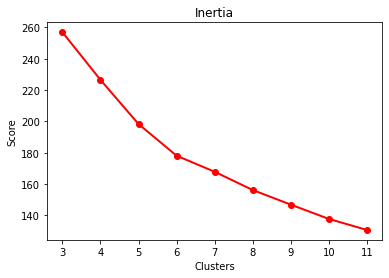

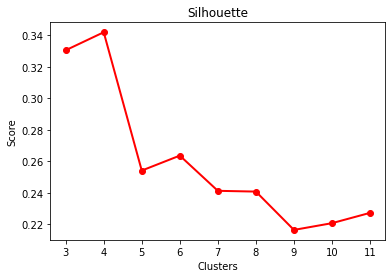

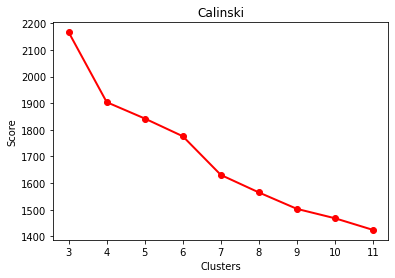

In [305]:
drawElbow( K_LIST, I_LIST, "Inertia" )
drawElbow( K_LIST, S_LIST, "Silhouette" )
drawElbow( K_LIST, C_LIST, "Calinski" )

In [306]:
# To predict current account (0) vs default account (1)
TARGET = 'TARGET_BF' 

def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ", K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    print( G.mean() )
    print("\n\n\n")
    print( G[TARGET_BF].value_counts() )

clusterData(df, X_TRN, 3, TARGET)
clusterData(df, X_TRN, 4, TARGET)
clusterData(df, X_TRN, 6, TARGET)
# clusterData(df, X_TRN, 7, TARGET)
# clusterData(df, X_TRN, 8, TARGET)
# clusterData(df, X_TRN, 9, TARGET)
# clusterData(df, X_TRN, 10, TARGET)





K =  3
   TARGET_BAD_FLAG  TARGET_LOSS_AMT  LOAN  ...  CLNO  DEBTINC CLUSTER
0                1            641.0  1100  ...   9.0      NaN       0
1                1           1109.0  1300  ...  14.0      NaN       0
2                1            767.0  1500  ...  10.0      NaN       0
3                1           1425.0  1500  ...   NaN      NaN       0
4                0              NaN  1700  ...  14.0      NaN       0

[5 rows x 15 columns]
         TARGET_BAD_FLAG  TARGET_LOSS_AMT  ...       CLNO    DEBTINC
CLUSTER                                    ...                      
0               0.217306     10575.177835  ...  19.951393  33.642604
1               0.173485     12239.179039  ...  21.135321  32.863545
2               0.172123     26852.293478  ...  25.791667  35.288589

[3 rows x 12 columns]




CLUSTER  TARGET_BAD_FLAG
0        0                  2795
         1                   776
1        0                  1091
         1                   229
2        0       